# 01 - Análise Exploratória (EDA) do Dataset Adult

Este notebook realiza a **Análise Exploratória de Dados (EDA)** do dataset `adult.csv`, utilizado no projeto de Ciência de Dados e Análise Preditiva.

Objetivos principais:
- Entender a estrutura do dataset (colunas, tipos e tamanho).
- Explorar distribuições de variáveis numéricas (como `age` e `hours-per-week`).
- Analisar frequências de variáveis categóricas (como `workclass`, `education`, `occupation`).
- Investigar a relação entre as features e a variável alvo `income` (<=50K ou >50K).
- Justificar a seleção das variáveis que serão usadas na modelagem.



In [19]:
# Verificar e instalar dependências se necessário

import sys
import subprocess
from pathlib import Path

def instalar_dependencias():
    """Instala as dependências do requirements.txt se não estiverem disponíveis"""
    try:
        import pandas
        import matplotlib
        import seaborn
        print("✓ Todas as dependências já estão instaladas!")
        return
    except ImportError as e:
        print(f"⚠ Dependência faltando: {e.name}")
        print("Instalando dependências...")
        
        root_dir = Path().resolve()
        req_path = root_dir / "requirements.txt"
        if not req_path.exists():
            req_path = root_dir.parent / "requirements.txt"
        
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", str(req_path), "--quiet"])
        print("✓ Dependências instaladas com sucesso!")
        print("⚠ Por favor, reinicie o kernel e rode esta célula novamente.")

# Executar verificação
instalar_dependencias()

# Agora importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# Em notebooks, usamos o diretório atual e subimos um nível se necessário
root_dir = Path().resolve()
data_path = root_dir / "data" / "adult.csv"

if not data_path.exists():
    # tenta na pasta acima (se o notebook estiver em /notebooks)
    data_path = root_dir.parent / "data" / "adult.csv"

df = pd.read_csv(data_path)

df.head()


✓ Todas as dependências já estão instaladas!


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
# Informações gerais do dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
# Estatísticas descritivas para variáveis numéricas

colunas_numericas = [
    "age",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

df[colunas_numericas].describe()


,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


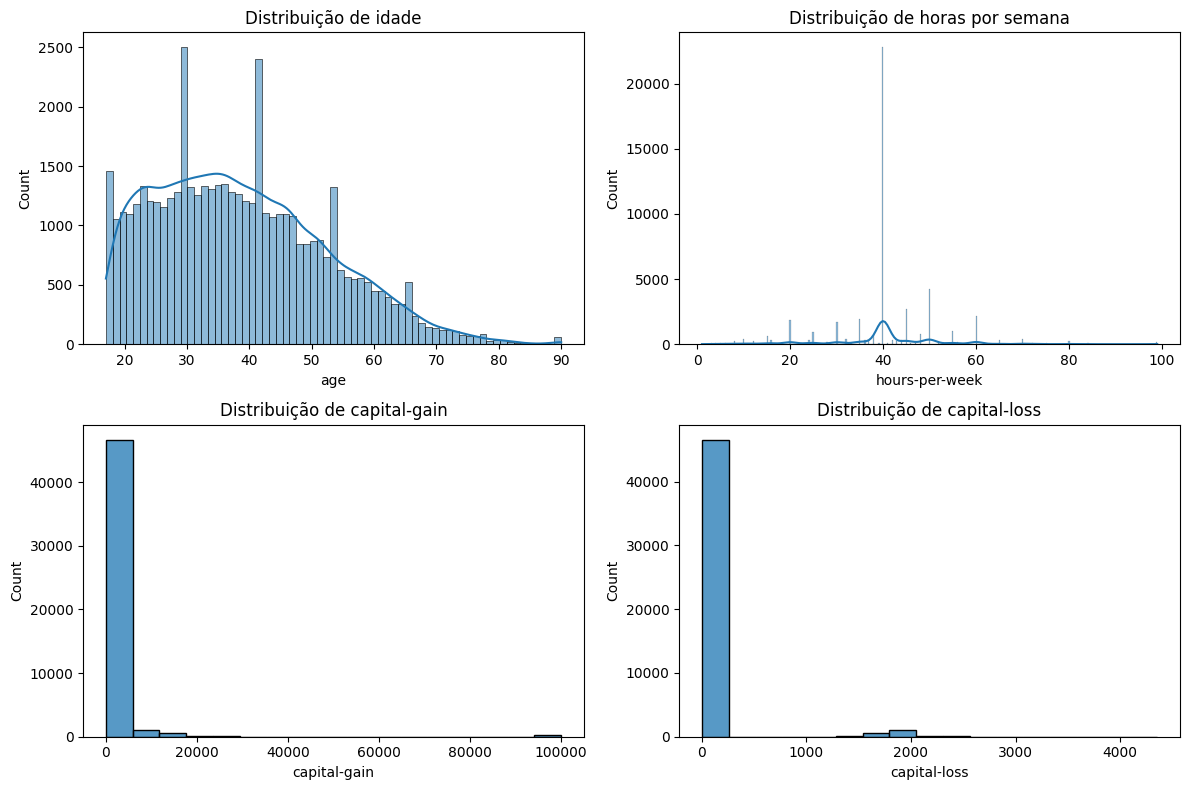

In [22]:
# Distribuições de algumas variáveis numéricas

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

sns.histplot(df["age"], kde=True, ax=axes[0])
axes[0].set_title("Distribuição de idade")

sns.histplot(df["hours-per-week"], kde=True, ax=axes[1])
axes[1].set_title("Distribuição de horas por semana")

sns.histplot(df["capital-gain"], kde=False, ax=axes[2])
axes[2].set_title("Distribuição de capital-gain")

sns.histplot(df["capital-loss"], kde=False, ax=axes[3])
axes[3].set_title("Distribuição de capital-loss")

plt.tight_layout()
plt.show()


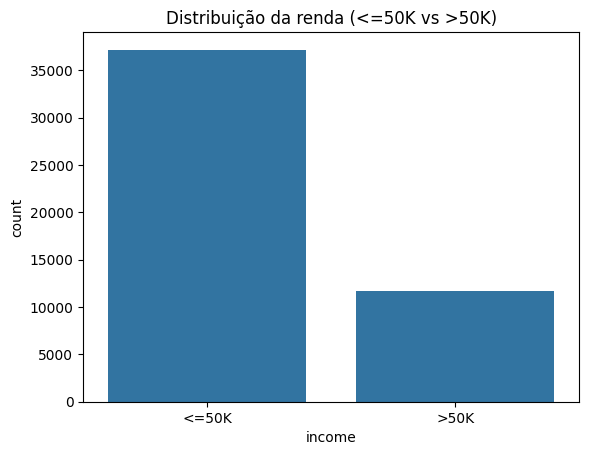

income
<=50K    76.07
>50K     23.93
Name: proportion, dtype: float64

In [23]:
# Distribuição da variável alvo income

sns.countplot(data=df, x="income")
plt.title("Distribuição da renda (<=50K vs >50K)")
plt.show()

(df["income"].value_counts(normalize=True) * 100).round(2)


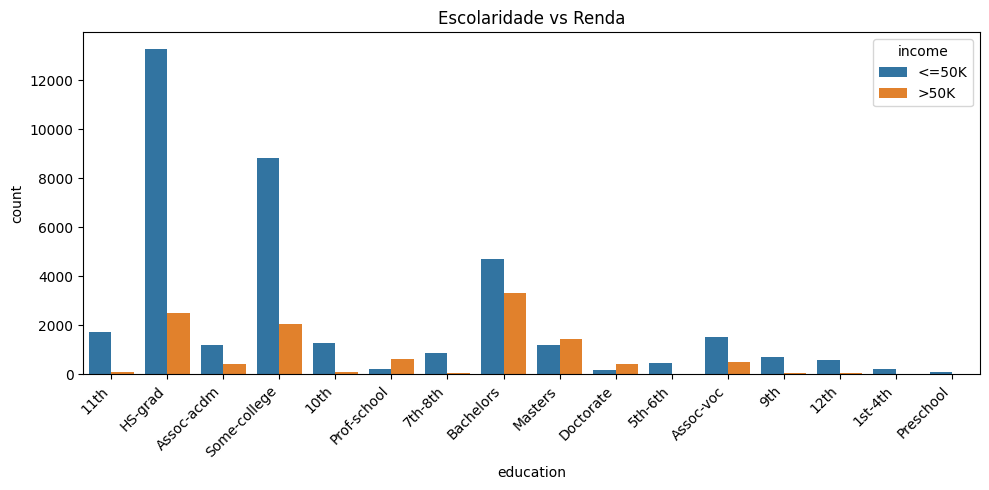

In [24]:
# Relação entre escolaridade e renda

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="education", hue="income")
plt.xticks(rotation=45, ha="right")
plt.title("Escolaridade vs Renda")
plt.tight_layout()
plt.show()


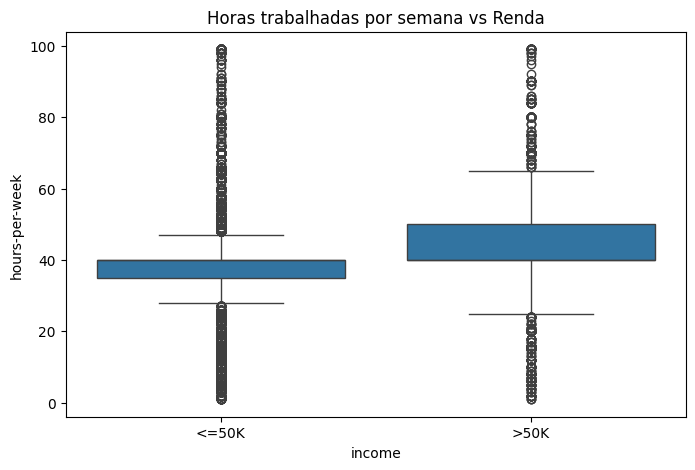

In [25]:
# Relação entre horas trabalhadas e renda

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="income", y="hours-per-week")
plt.title("Horas trabalhadas por semana vs Renda")
plt.show()


## Conclusões da EDA e seleção de variáveis

A partir da EDA, observamos que:
- A variável alvo `income` é desbalanceada (maior proporção de indivíduos com renda <=50K).
- Variáveis como `education`, `workclass`, `occupation` e `hours-per-week` apresentam relação visível com a renda.
- Variáveis numéricas como `age`, `educational-num`, `capital-gain` e `capital-loss` também mostram diferenças entre os grupos de renda.

Na etapa de modelagem, usaremos como **features** todas as variáveis originais exceto `income`, aplicando codificação adequada às variáveis categóricas. A variável `income` será convertida para uma representação binária (0 = <=50K, 1 = >50K).
